In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from functions import *

In [2]:
now = dt.datetime.now()
now = now.strftime('%Y-%m-%d')

# Data import

In [3]:
# load last year's ARPA sensor data - downloaded feb 20, 2024 from: https://www.dati.lombardia.it/Ambiente/Dati-sensori-aria/nicp-bhqi/about_data
path = './data/Dati_sensori_aria_20240220.csv'
old_data = pd.read_csv(path)

# load this year's arpa sensor data - downloaded 13 Jan 2025 from: https://www.dati.lombardia.it/Ambiente/Dati-sensori-aria/nicp-bhqi/about_data
path = './data/Dati_sensori_aria_20250113.csv'
data = pd.read_csv(path)

## Milan daily averages of PM2.5

In [4]:
# calculate 24-hour PM2.5 average per collection station
pm_data, mean_milan = pm25_sensors_avg(data)
old_pm_data, old_mean_milan = pm25_sensors_avg(old_data)

# remove redundant data
old_mean_milan = old_mean_milan[old_mean_milan['date'] < mean_milan['date'].min()]
old_pm_data = old_pm_data[old_pm_data['date'] < pm_data['date'].min()]

# merge
mean_milan = pd.concat([old_mean_milan, mean_milan], axis=0)
pm_data = pd.concat([old_pm_data, pm_data], axis=0)

## Milan daily averages of PM10

In [5]:
# calculate 24-hour PM10 average per collection station
pm10_data, mean_pm10_milan = pm10_sensors_avg(data)
old_pm10_data, old_mean_pm10_milan = pm10_sensors_avg(old_data)

# remove redundant data
old_mean_pm10_milan = old_mean_pm10_milan[old_mean_pm10_milan['date'] < mean_pm10_milan['date'].min()]
old_pm10_data = old_pm10_data[old_pm10_data['date'] < mean_pm10_milan['date'].min()]

# merge
mean_pm10_milan = pd.concat([old_mean_pm10_milan, mean_pm10_milan], axis=0)
pm10_data = pd.concat([old_pm10_data, pm10_data], axis=0)

## Lombardia sensor codes

In [6]:
# downloaded feb. 19 2024 from: https://www.dati.lombardia.it/Ambiente/Stazioni-qualit-dell-aria/ib47-atvt/about_data
path = './data/Stazioni_qualit__dell_aria_20240219.csv'
map_data = pd.read_csv(path)

pm_stations = map_data[map_data['NomeTipoSensore'] == 'Particelle sospese PM2.5'].copy()
pm_stations = list(pm_stations['IdSensore'])

pm10_stations = map_data[map_data['NomeTipoSensore'] == 'PM10 (SM2005)'].copy()
pm10_stations = list(pm10_stations['IdSensore'])

## Lombardia daily averages of PM2.5

In [7]:
# calculate 24-hour PM2.5 average per collection station
mean_pm_lombardia = calculate_sensor_avg(data, pm_stations)
old_mean_pm_lombardia = calculate_sensor_avg(old_data, pm_stations)

# remove redundant data
old_mean_pm_lombardia = old_mean_pm_lombardia[old_mean_pm_lombardia['date'] < mean_pm_lombardia['date'].min()]

# merge
mean_pm_lombardia = pd.concat([old_mean_pm_lombardia, mean_pm_lombardia], axis=0)

## Lombardia daily averages of PM10

In [8]:
# calculate 24-hour PM10 average per collection station
mean_pm10_lombardia = calculate_sensor_avg(data, pm10_stations)
old_mean_pm10_lombardia = calculate_sensor_avg(old_data, pm10_stations)

# remove redundant data
old_mean_pm10_lombardia = old_mean_pm10_lombardia[old_mean_pm10_lombardia['date'] < mean_pm10_lombardia['date'].min()]

# merge
mean_pm10_lombardia = pd.concat([old_mean_pm10_lombardia, mean_pm10_lombardia], axis=0)

# Plots

## Milan PM2.5

/var/folders/3r/b2dyxl0j3x39s5d2571gcp6h0000gq/T/ipykernel_77422/3584388685.py:136: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


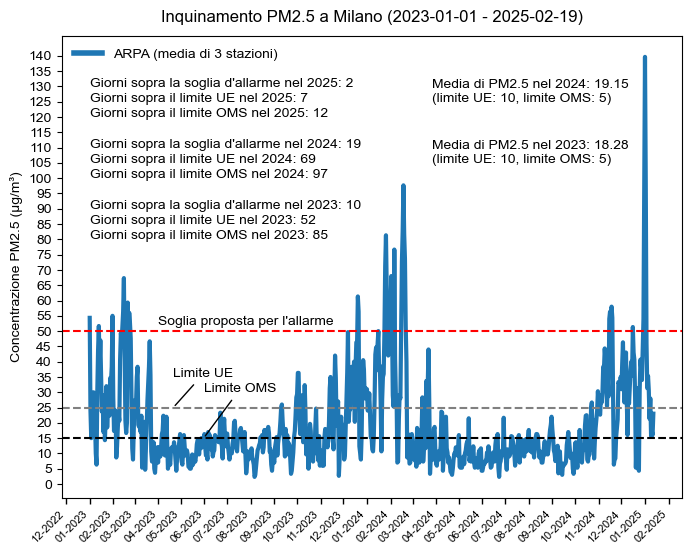

In [10]:
# plot
plot_air_quality_25(mean_milan, 'Milano', '01/01/2023', '2/19/2025')

## Lombardia PM2.5

/var/folders/3r/b2dyxl0j3x39s5d2571gcp6h0000gq/T/ipykernel_77422/4083847911.py:136: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


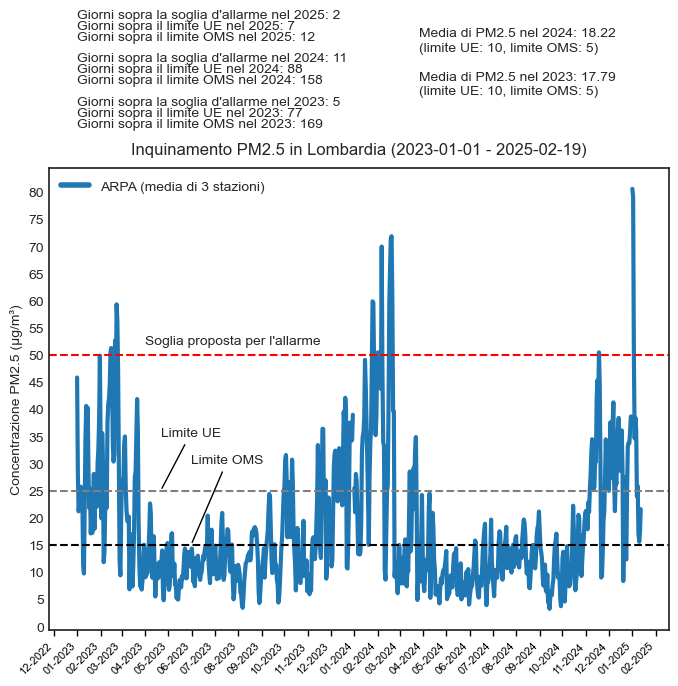

In [55]:
# plot
plot_air_quality_25_lombardia(mean_pm_lombardia, 'Lombardia', '01/01/2023', '2/19/2025')

## Milan PM10 

/var/folders/3r/b2dyxl0j3x39s5d2571gcp6h0000gq/T/ipykernel_77422/1850603830.py:110: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


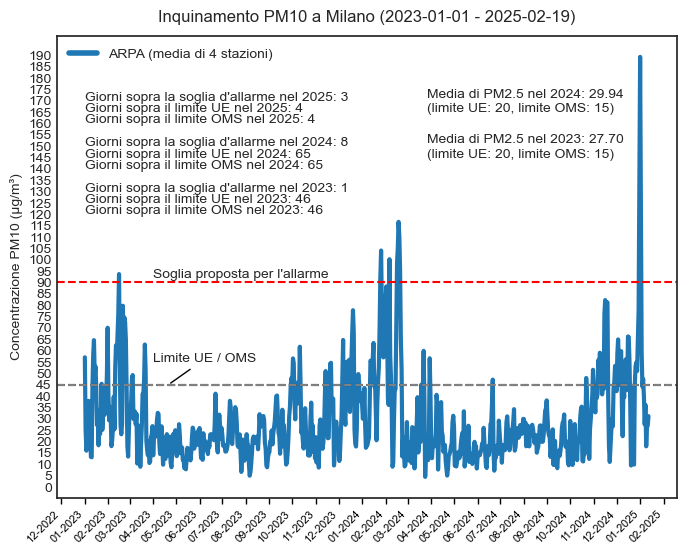

In [13]:
# plot
plot_air_quality_pm10(mean_pm10_milan, 'Milano', '01/01/2023', '2/19/2025')

## Lombardia PM10

/var/folders/3r/b2dyxl0j3x39s5d2571gcp6h0000gq/T/ipykernel_77422/2886382385.py:110: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


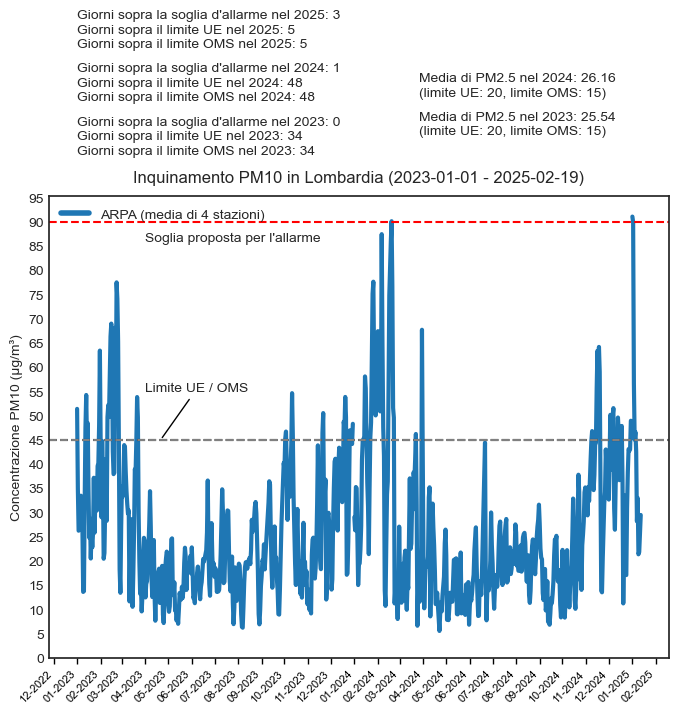

In [45]:
plot_air_quality_pm10_lombardia(mean_pm10_lombardia, 'Lombardia', '01/01/2023', '2/19/2025')